In [50]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation

from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from IPython.display import HTML


#loading the boston dataset
boston = pd.read_csv('boston.csv')
#print(boston)
#df

#loading the target dataset
target = pd.read_csv('target.csv')
#target

df = pd.concat([boston, target],axis=1)
df

,Sno,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,target
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,22.0


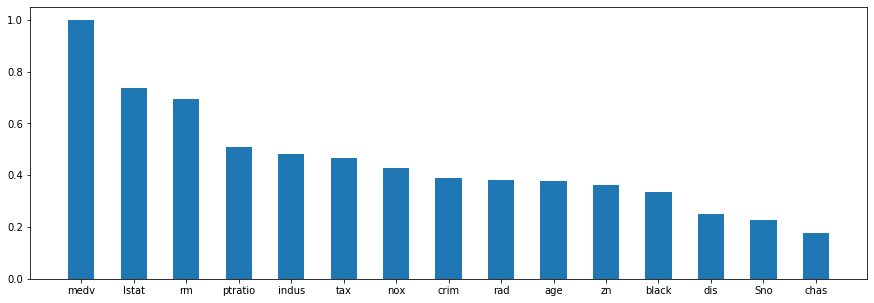

In [51]:
#finding the correlation between each feature and the target 
corr = df.corr('pearson')

#take absolute values of the correlation
corrs = [abs(corr[attr]['target']) for attr in list(boston)]

#Make a list of pairs
l = list(zip(corrs,list(boston)))

#sort the list of pairs in descending order
#sort with the key values as corrs
l.sort(key = lambda x: x[0], reverse = True)


corrs,labels = list(zip((*l)))

index = np.arange(len(labels))


plt.figure(figsize=(15,5))
plt.bar(index,corrs,width=0.5)
plt.xticks(index,labels)
plt.show()

In [52]:
#Now we prepare the data for normalizaation
#This is a data preprocessing step

X = df['lstat'].values
Y = df['target'].values

x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X.reshape(-1,1))
X = X[:,-1]
y_scaler = MinMaxScaler()
Y = y_scaler.fit_transform(Y.reshape(-1,1))
Y = Y[:,-1]

In [53]:
#defining error function
#we will use mean squared error function for our linear regression model

def error(m, x, c, t):
    N = x.size
    e = sum(((m*x+c)-t)**2)
    return e*1/(2*N)

#Splitting the data
#we define 0.2, to make 20% of the dataset to be taken for testing

xtrain,xtest,ytrain,ytest = train_test_split(X, Y, test_size=0.2)


def update(m,x,c,t,learning_rate):
    grad_m = sum(2*((m*x+c)-t)*x)
    grad_c = sum(2*((m*x+c)-t))
    m = m-grad_m*learning_rate
    c = c-grad_c*learning_rate
    return m,c


def gradient_descend(init_m,init_c,x,t,learning_rate,iterations,error_threshold):
    m = init_m
    c = init_c
    error_values = list()
    mc_values = list()
    for i in range(iterations):
        e = error(m,x,c,t)
        if e < error_threshold:
            print('Error less than threshold. Stopping gradient descend...')
            break
        error_values.append(e)
        m,c = update(m,x,c,t,learning_rate)
        mc_values.append((m,c))
    return m,c,error_values,mc_values

In [54]:
%%time
init_m = 0.9
init_c = 0
learning_rate = 0.001
iterations = 250
error_threshold = 0.001
m, c, error_values, mc_values = gradient_descend(init_m,init_c,xtrain,ytrain,learning_rate,iterations,error_threshold)

Wall time: 97.7 ms


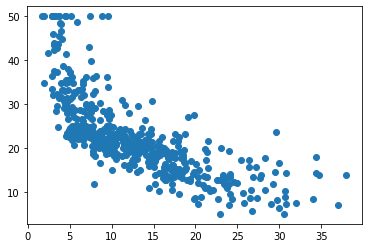

In [55]:
plt.scatter(df['lstat'],df['target'])

In [56]:
#Here we will do the prediction

predicted = (m*xtest) + c

#Now we check the mean_squared_error for the predicted values
mean_squared_error(ytest,predicted)


#lets prepare a dataframe of predicted values,with targeted test values

p=pd.DataFrame(list(zip(xtest,ytest,predicted)),columns=['x','target_y','predicted'])
p.head()

,x,target_y,predicted
0,0.796358,0.000000,0.023688
1,0.174393,0.533333,0.488697
2,0.160044,0.515556,0.499425
3,0.414183,0.284444,0.309419
4,0.207506,0.353333,0.463940


In [57]:
predicted = predicted.reshape(-1,1)
xtest = xtest.reshape(-1,1)
ytest = ytest.reshape(-1,1)

xtest_scaled = x_scaler.inverse_transform(xtest)
ytest_scaled = y_scaler.inverse_transform(xtest)
predicted_scaled = y_scaler.inverse_transform(predicted)

#this is to remove the extra dimension
xtest_scaled = xtest_scaled[:,-1]
ytest_scaled = ytest_scaled[:,-1]
predicted_scaled = predicted_scaled[:,-1]

p1 = pd.DataFrame(list(zip(xtest_scaled,xtest_scaled,predicted_scaled)),columns=['x','target_y','predicted'])
p1.head()

,x,target_y,predicted
0,30.59,30.59,6.065967
1,8.05,8.05,26.991357
2,7.53,7.53,27.474108
3,16.74,16.74,18.923849
4,9.25,9.25,25.877317


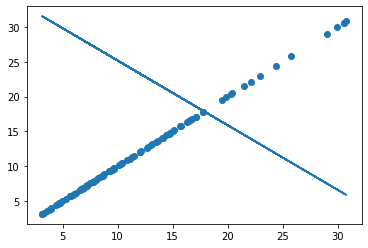

In [58]:
plt.scatter(p1['x'],p1['target_y'])
plt.plot(p1['x'],p1['predicted'])